<a href="https://colab.research.google.com/github/SunnyDahitJ/Computer_Vision/blob/main/Cv_practical_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [ ]:
oimg = cv2.imread("/content/drive/MyDrive/Computer_vision/Input images/lab_4img.jpg")
kernel = np.array([
    [0, -1, 0],
    [-1, 8, -1],
    [0, -1, 0]
])

img = cv2.filter2D(oimg, -1, kernel)
img = cv2.cvtColor(oimg, cv2.COLOR_BGR2GRAY)


Text(0.5, 1.0, 'Sobel')

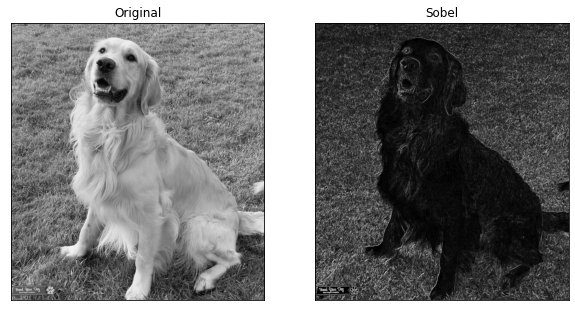

In [ ]:
grad_x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
grad_y = cv2.Sobel(img, cv2.CV_16S, 0, 1)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.2, abs_grad_y, 0.2, 0)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Original")
plt.subplot(122)
plt.imshow(grad, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Sobel")

Text(0.5, 1.0, 'Roberts')

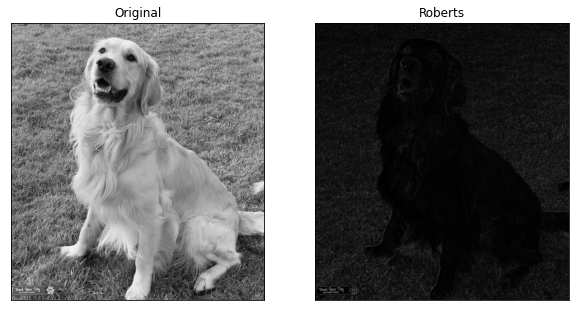

In [ ]:
roberts_cross_v = np.array([[1, 0], [0, -1]])
roberts_cross_h = np.array([[0, 1], [-1, 0]])

copy_img = np.copy(img).astype('float64')
copy_img /= 255.0
vertical = ndimage.convolve(copy_img, roberts_cross_v)
horizontal = ndimage.convolve(copy_img, roberts_cross_h )
edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))
edged_img *= 255

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Original")
plt.subplot(122)
plt.imshow(edged_img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Roberts")

Text(0.5, 1.0, 'Prewitt')

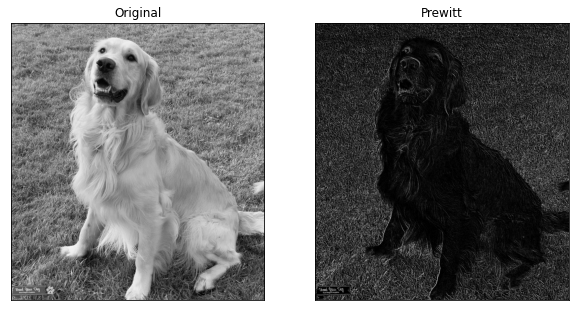

In [ ]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Original")
plt.subplot(122)
plt.imshow(img_prewittx + img_prewitty, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Prewitt")

Text(0.5, 1.0, 'Laplacian')

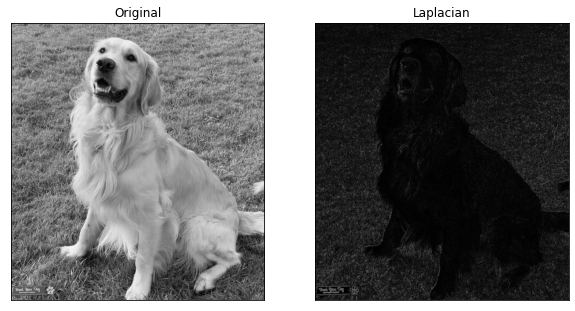

In [ ]:
laplacian = cv2.Laplacian(img, -1, ksize=3)
abs_dst = cv2.convertScaleAbs(laplacian)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Original")
plt.subplot(122)
plt.imshow(abs_dst, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Laplacian")

Text(0.5, 1.0, 'Canny')

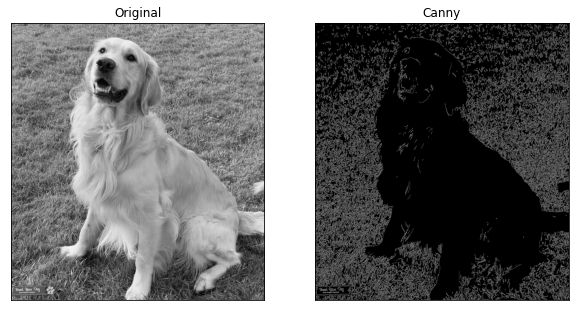

In [ ]:
canny = cv2.Canny(img, 100, 250)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Original")
plt.subplot(122)
plt.imshow(canny, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Canny")